In [1]:
import functions
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dd = functions.array_from_TDMSgroup("patients/P048/P048_S01_D2024-06-06_G26.tdms", "R001")
bp_data = functions.bandpass_filter(dd, low=0.5, high= 100)

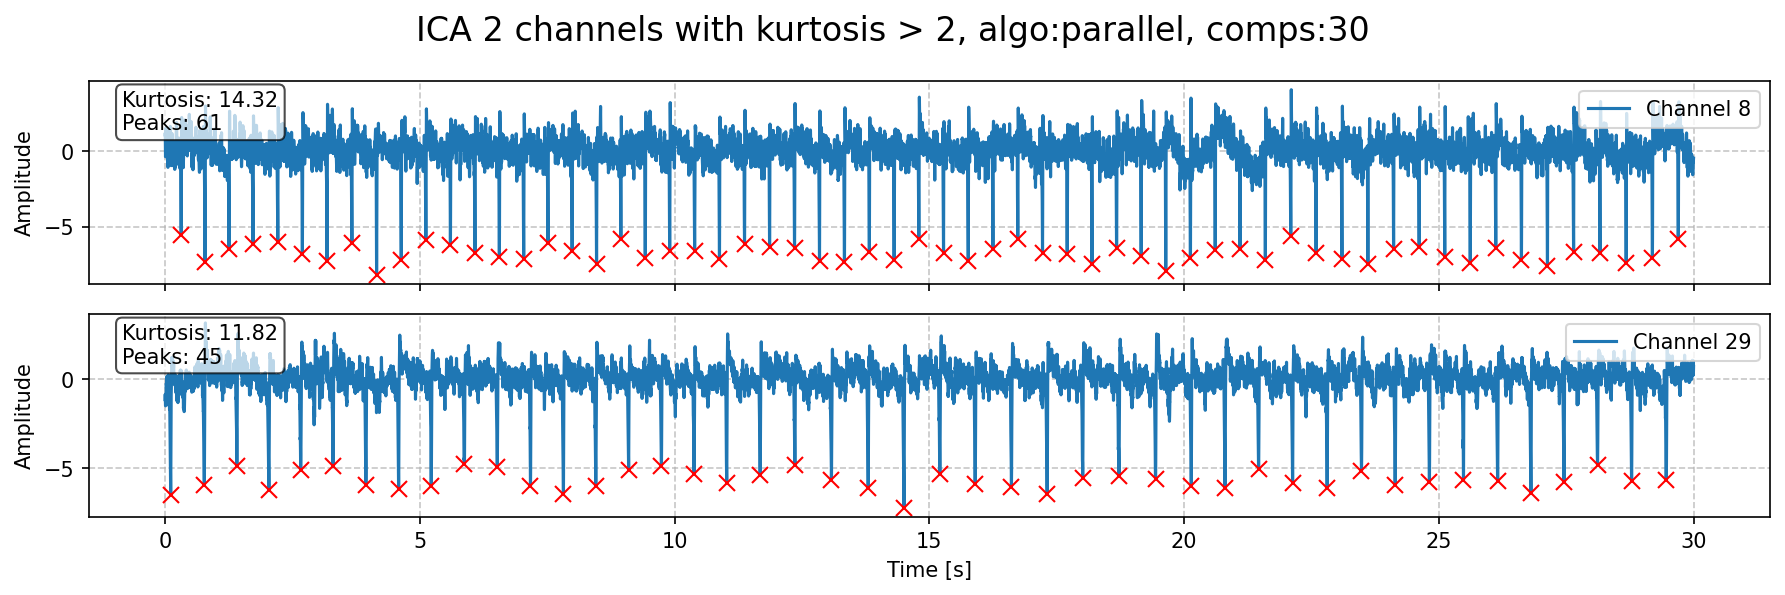

In [5]:
fs = 1000
# normally, they were using deflation algorithm but parallel is much much faster, and produce similar results
sources, ica = functions.FASTICA(bp_data, n_comp=30, algo='parallel')
compF, maternals = functions.plotICA(sources, ica, offset= 10*fs, span=30*fs, kurt_threshold=2, mse_th=0.2)


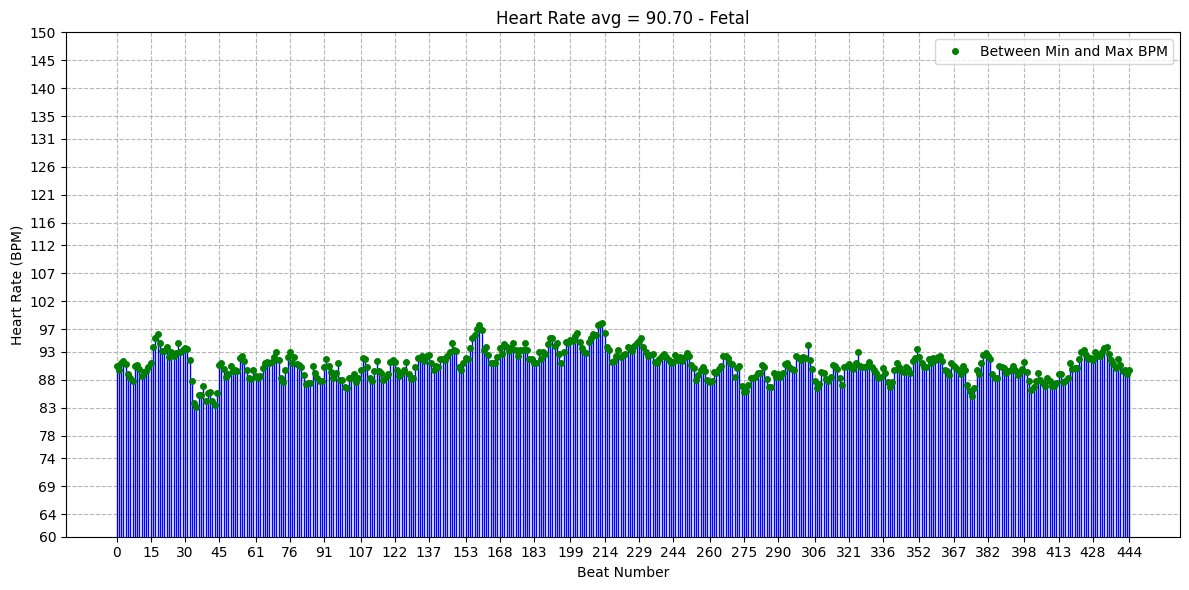

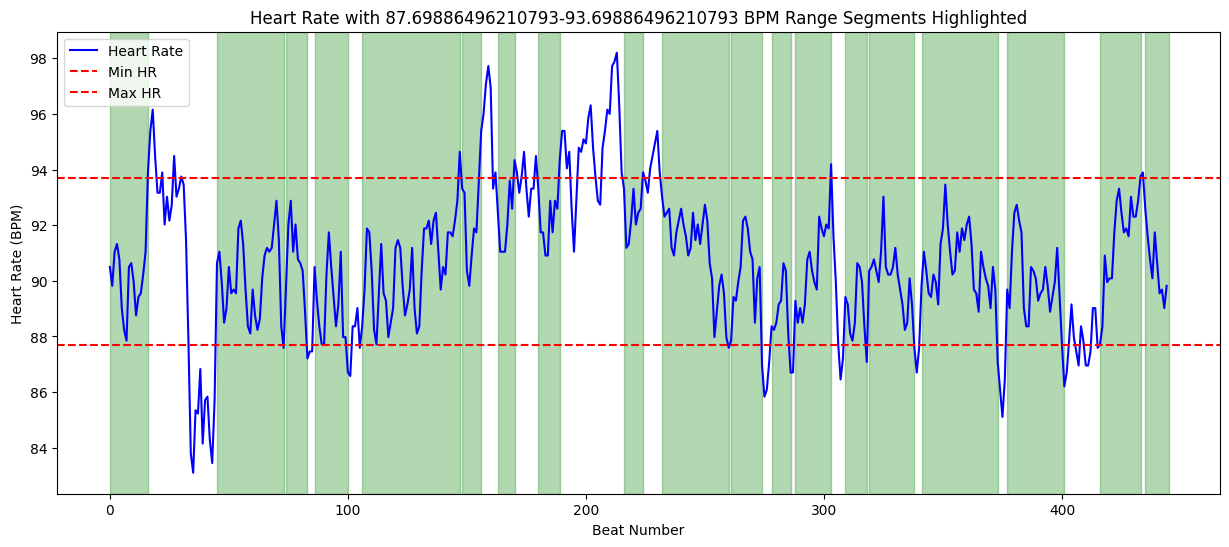

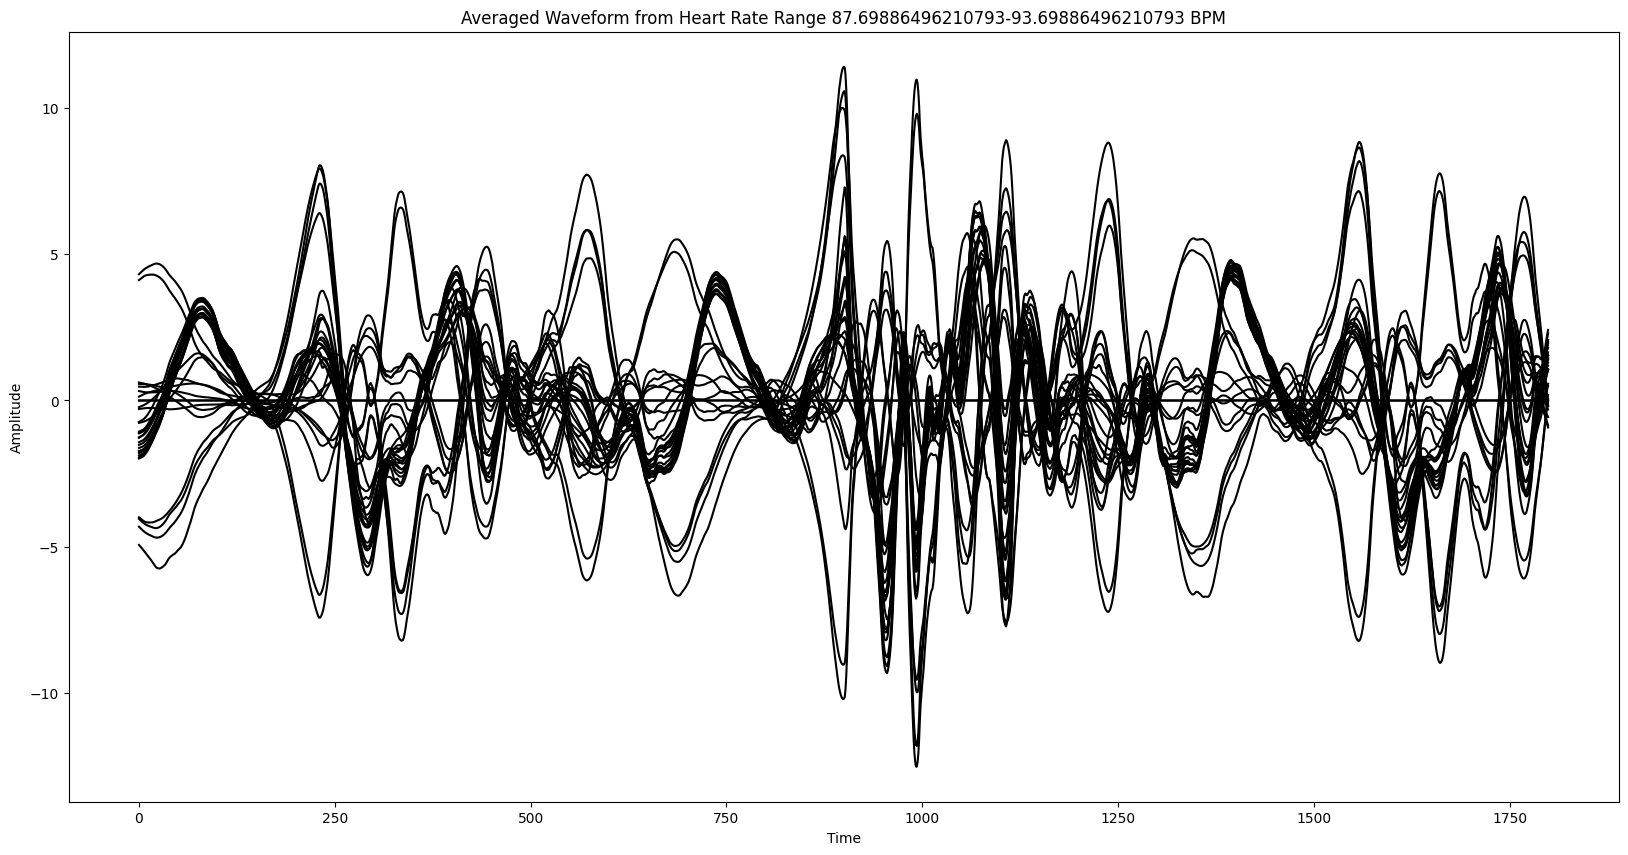

In [9]:
maternal = sources[:, maternals[0]]
heartRate, peaksMat = functions.plotHR(maternal)

avgHR = np.mean(heartRate)
minHr = avgHR - 3
maxHR = avgHR + 3
window_size = 1800
segment_length = 5

range_segments = functions.identify_hr_range_segments(heartRate, min_hr=minHr, max_hr=maxHR, plot=True, min_segment_length=segment_length)
avg_waveform = functions.avg_channels_hr_range(bp_data, peaksMat, heartRate, window_size=window_size, denoise=True, plot=True, min_hr=minHr, max_hr=maxHR, segment_length = segment_length)

### Ica component averaging

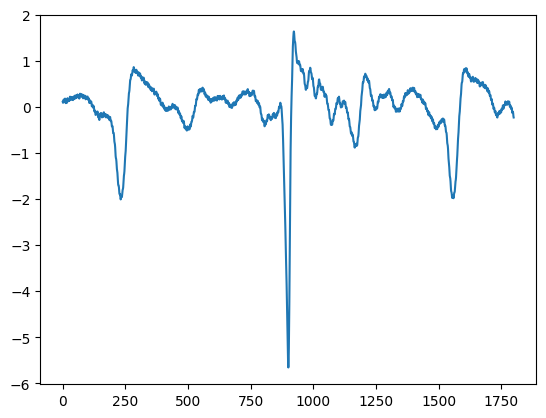

In [8]:
avg = functions.__avg_hr_range(maternal, peaksMat, heartRate, window_size)
plt.plot(avg)